In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import empiricaldist
from    import parse_stata_dict

In [4]:
dict_file='GSS.dct'
data_file='GSS.dat.gz'
stata_dict = parse_stata_dict(dict_file)

In [6]:
import gzip
fp= gzip.open(data_file)

gss = pd.read_fwf(fp,names=stata_dict.names,colspecs=stata_dict.colspecs)

print(gss.shape)
print(gss.head())


(64814, 8)
   YEAR  ID_  AGE  EDUC  SEX  GUNLAW  GRASS  REALINC
0  1972    1   23    16    2       1      0  18951.0
1  1972    2   70    10    1       1      0  24366.0
2  1972    3   48    12    2       1      0  24366.0
3  1972    4   27    17    2       1      0  30458.0
4  1972    5   61    12    2       1      0  50763.0


In [10]:
#Distribution of education
print(gss['EDUC'].value_counts().sort_index())

#The value 98 and 99 are special code "Don't know" and "no answer". We'll use replacethese code with NaN

import numpy as np
educ = gss['EDUC'].replace([98,99],np.nan)

0       165
1        47
2       152
3       257
4       319
5       402
6       828
7       879
8      2724
9      2083
10     2880
11     3743
12    19663
13     5360
14     7160
15     2910
16     8355
17     1967
18     2384
19      920
20     1439
98       73
99      104
Name: EDUC, dtype: int64


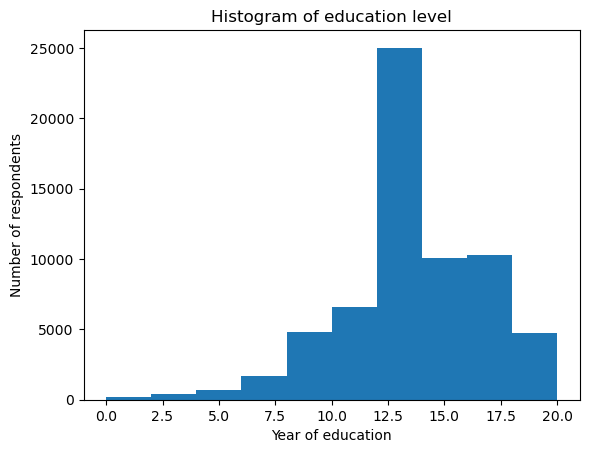

In [11]:
#Visualize it
import matplotlib.pyplot as plt
educ.hist(grid=False)
plt.xlabel('Year of education')
plt.ylabel('Number of respondents')
plt.title('Histogram of education level');
plt.show()

In [12]:
from empiricaldist import Pmf
pmf_educ= Pmf.from_seq(educ,normalize=False)
print(type(pmf_educ))
print(pmf_educ.head())
print(pmf_educ.tail())
print(pmf_educ[20])


<class 'empiricaldist.empiricaldist.Pmf'>
0.0    165
1.0     47
2.0    152
Name: , dtype: int64
18.0    2384
19.0     920
20.0    1439
Name: , dtype: int64
1439


In [13]:
#usually when we make a PMF , we want to know the fraction of respondents with each value , rather than the counts. WE can do that by settingnormalize=True; then we get a normalize PMF, that is , a PMF where the value in the second column add up to 1
pmf_educ_norm= Pmf.from_seq(educ, normalize=True)
print(pmf_educ_norm.head())
print(pmf_educ_norm[12]) #sample for 12 years of experience

0.0    0.002553
1.0    0.000727
2.0    0.002352
Name: , dtype: float64
0.30420656899299164


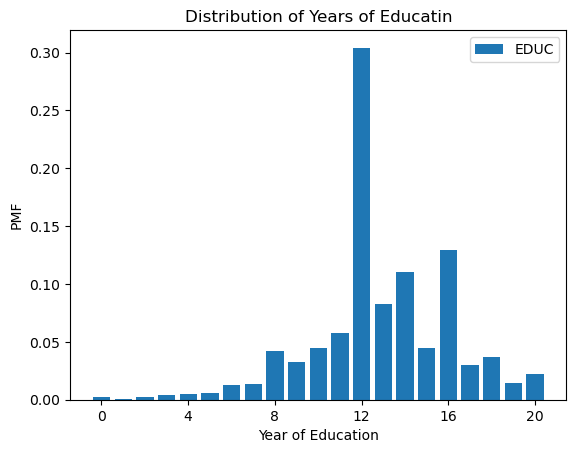

In [15]:
'''Pmf provides a bar method that plots the values and their probabilities as a bar chart'''
pmf_educ_norm.bar(label='EDUC')

plt.xlabel('Year of Education')
plt.xticks(range(0,21,4))
plt.ylabel('PMF')
plt.title('Distribution of Years of Educatin')
plt.legend();
plt.show()

In [16]:
'''EXERCISE: Lets look at the Year column in the dataframe, which represents the year each respondent was interviewed.
MAke an unnormalized Pmf for YEAR and Display the result.How many respondents were interviewed in 2018'''


'EXERCISE: Lets look at the Year column in the dataframe, which represents the year each respondent was interviewed.\nMAke an unnormalized Pmf for YEAR and Display the result.How many respondents were interviewed in 2018'

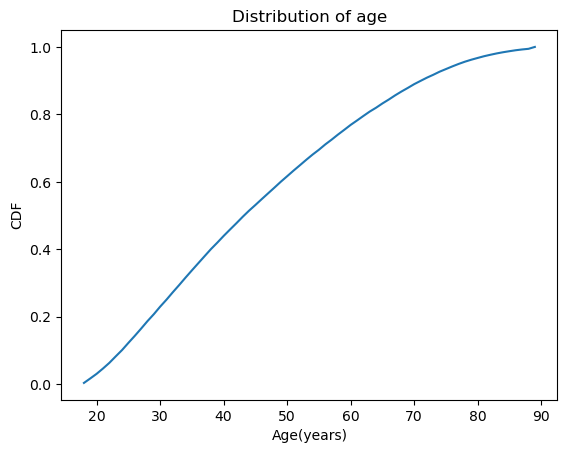

In [18]:
# Now CDF
from empiricaldist import Cdf
#Age 98 and 99 mean do not know and do not answer _ so replace them
age=gss['AGE'].replace([98,99],np.nan)

cdf_age = Cdf.from_seq(age)
cdf_age.plot()
plt.xlabel('Age(years)')
plt.ylabel('CDF')
plt.title('Distribution of age');
plt.show()
#the X-axis is the ages, from 18 to 89. The y-axis is the cumulative probabilities ,from 0 to 1


In [19]:
#we can also obtain the cumulative probability up to a certain poin, eg, age 51:
q=51
p= cdf_age(q)
print(p)

#about 63% of the respondents are 51 years old or younger
#Inversely, find age at certain value of cumulative probability
p1=0.25
q1=cdf_age.inverse(p1)
print(q1)

#25% of the respondents are age 31 or less. Another way to say the same thing is 'age 31 is the 25th percentile of this distribution'.


0.6331867587402843
31.0


In [20]:
#We can now use 75th percentile to find IQR
# IT measures the spread of the distribution,so it is similar to standard deviation or variance.

p3=0.75
q3=cdf_age.inverse(p3)
print(q3)
print(q3-q1)

59.0
28.0


In [ ]:
'''EXERCISE: Using cdf_age, compute the fraction of the respondent in the GSS dataset that are older than 65.'''

In [34]:
q=65
p=cdf_age(q)
print(1-p)

q1=0.83
p1=cdf_age.inverse(q1)
print(p1)

0.16757501625739324
65.0


In [29]:
# now let us compare PMF and CMF

In [30]:
#Create series for male and female respondents
male=(gss['SEX']==1)
female=(gss['SEX']==2)

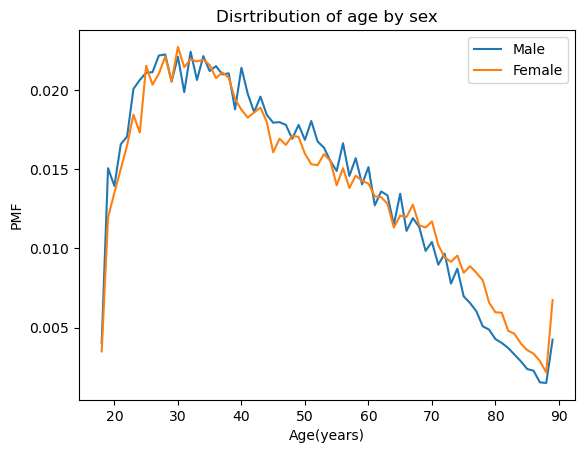

In [32]:
# Select ages
male_age =age[male]
female_age=age[female]

# PLot PMF for each
pmf_male_age= Pmf.from_seq(male_age)
pmf_male_age.plot(label='Male')
pmf_female_age= Pmf.from_seq(female_age)
pmf_female_age.plot(label='Female')

plt.xlabel('Age(years)')
plt.ylabel('PMF')
plt.title('Disrtribution of age by sex')
plt.legend();
plt.show()

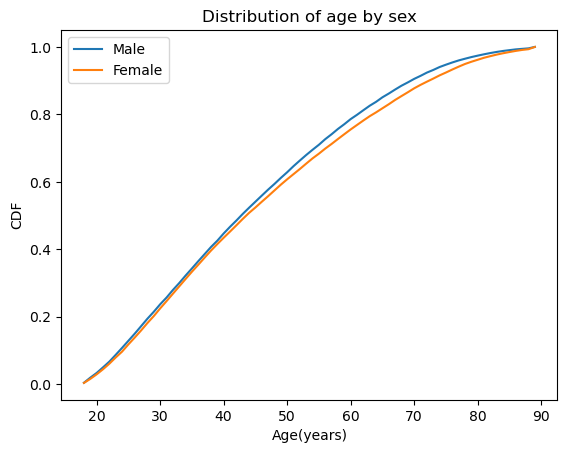

In [35]:
#now CDF same data_file 
cdf_male_age= Cdf.from_seq(male_age)
cdf_male_age.plot(label='Male')
cdf_female_age= Cdf.from_seq(female_age)
cdf_female_age.plot(label='Female')

plt.xlabel('Age(years)')
plt.ylabel('CDF')
plt.title('Distribution of age by sex')
plt.legend();
plt.show()


In [ ]:
#Observations:
#In general,CDFs are smoother than PMFs .Because they smooth out randomness, we can often get abretter view of real 

In [36]:
print(cdf_male_age(60),cdf_female_age(60))

0.785999579566954 0.7552990789035623


In [37]:
#comparing male and female at the 50th percentile 
print(cdf_male_age.inverse(0.5),cdf_female_age.inverse(0.5))

43.0 44.0


# LAb EXERCISE: What fraction of men are over 80? What fraction of women?

In [38]:
# Now income analysis
#the variable REALINC represents household income in 1986 dollars
pre95=(gss['YEAR']<1995)
post95=(gss['YEAR']>=1995)

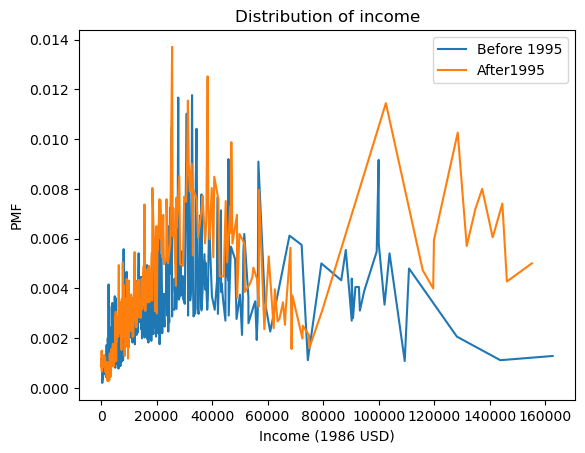

In [40]:
income=gss['REALINC'].replace(0,np.nan)
Pmf.from_seq(income[pre95]).plot(label='Before 1995')
Pmf.from_seq(income[post95]).plot(label='After1995')

#Plot PMF's
plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.title('Distribution of income')
plt.legend();
plt.show()
# PMF's are good for one value when to plot graph

In [ ]:
# below $30,000 the CDF's are almost identical; above that, we can see that the post-1995 distribution is shifted to
# the right.I other words, the fracton of people with high income is about the same, but the income of high earners 
#has increased

In [ ]:
# Lab Exercise: In th previous figure, the doller amounts are big enough that the labels on the x axis are crowded.
# Improve the figure by expresing income in 1000's of dollars

In [43]:
# Kernel density estimation or probability Density Function(PDF)
age_data=gss['AGE']

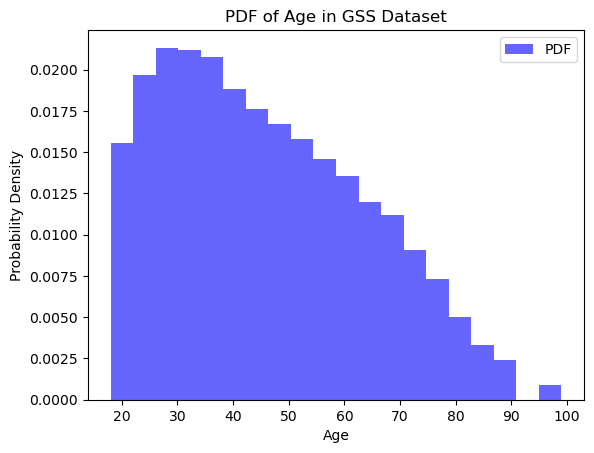

In [45]:
# create a hisotogram to visualize the PDF
# setting the density parameter to true means that the histogram will be normalised so that the area under the histogram
#is equal to 1. This normalization is often done when you want to represent the histogram as an estimate of probability d
# Density Function(PDF)
plt.hist(age_data,bins=20,density=True,alpha=0.6,color='b',label='PDF')
plt.xlabel("Age")
plt.ylabel("Probability Density")
plt.title('PDF of Age in GSS Dataset')
plt.legend()
plt.show()

In [46]:
# Corresponding PMF
pmf=age_data.value_counts(normalize=True).sort_index()

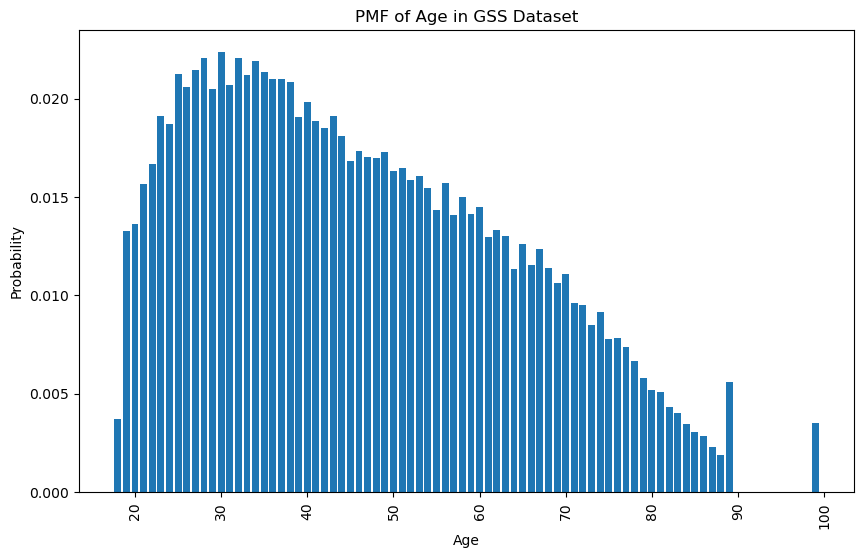

In [47]:
# create a bar plot of the PMF
plt.figure(figsize=(10,6))
plt.bar(pmf.index,pmf.values)
plt.xlabel("Age")
plt.ylabel("Probability")
plt.title('PMF of Age in GSS Dataset')
plt.xticks(rotation=90)
plt.show()

## BinomilaDistrubution

In [52]:
#No os successes : x or k
# Probability of success in a single trial: P
#Hospital record show that of patients suffering from a specific disease
from scipy.stats import binom
porob=binom.pmf(k=4,n=6,p=0.25)
print("Probability that 6 randomly selected Patients, four will recove :", porob)

Probability that 6 randomly selected Patients, four will recove : 0.03295898437499997


In [53]:
# a (blindfolded) marksman finds that on the avg, he hits the target '4' times out of '5'. If he fires '4' shots,
# what is a probability of (a) more than '2' hits and (b) at least '3' misses?
# For more than 2 hits, k can be either 3 or 4
# probability of more than 2 hits i.e. k=3 or 4
print("probability of more than 2 hits :",binom.pmf(k=3,n=n,p=p)+binom.pmf(k=4,n=n,p=p))

NameError: name 'n' is not defined

In [54]:
#n 0 or 1 hits i.e. k can be either 0 or 1
#probability of atleast 3 misses i.e. either 1 hit or 0 hits, so k=0 or 1
print("probability of atleast 3 misses:",binom.pmf(k=0,n=n,p=p)+binom.pmf(k=1,n=n,p=p))

NameError: name 'n' is not defined

In [ ]:
# Same thing but using CDF instead of PDF
print("probability of atleast 3 misses:",binom.cdf(k=1,n=n,p=p))

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import comb

In [59]:
n=4 # no of trials
k=1 # no of success
p=0.33 # Success rate
p_binomial=comb(n,k)*p**k*(1-p)**(n-k)
res=p_binomial*100
print(p_binomial)
print(res)

0.39700715999999986
39.700715999999986


# Poisson Distribution

In [60]:
'''
    A lif eInsurance salesman sells on the average 3 life insurance policies per week. USe Poisson's law to calculate
    the probability
    a. In a given week he will sell some policies
    b. In a given week, he will sell between 2 and 5 policies
    c. Assuming that per week, there are 5 working days, what is the probability that on a given day, he will sell
        one policy?
'''

from scipy.stats import poisson
#lambda
mu=3

In [61]:
# probability of selling some policies in a week
print("The probability of selling some policies in aweek:",1-poisson.pmf(k=0,mu=mu))

The probability of selling some policies in aweek: 0.950212931632136


In [63]:
# probability of selling 2 or more policies but less than 5 policies in a week
print("robability of selling 2 or more policies but less than 5 policies in a week: ",sum(poisson.pmf(k=[2,3,4],
                                                                                                      mu=mu)))

robability of selling 2 or more policies but less than 5 policies in a week:  0.6161149710523164


In [64]:
# assuming that per week, there are '5' working days, what is the probability that on a given day, he will sell one 
# Policy?
print("he probability that on a given day, he will sell one Policy :",poisson.pmf(k=1,mu=3/5))

he probability that on a given day, he will sell one Policy : 0.3292869816564159


In [65]:
# Interesting! It will Not be 100%!
print("The probability of selling 3 policies in a week: ", poisson.pmf(k=3,mu=mu))

The probability of selling 3 policies in a week:  0.22404180765538775


In [ ]:
''' EXERCISE: The distribution of income in almost every country is long tailes,which means there are a small 
number of people with very high income.In the GSS dataset, the column REALINC represents total household income,
converted to 1986 dollars. We can get a sense of the shape of this distribution by plotting the CDF'''